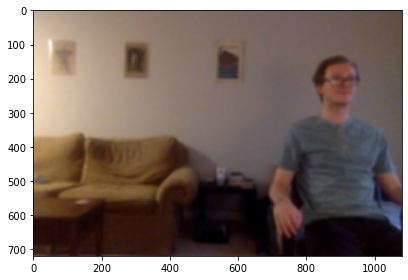

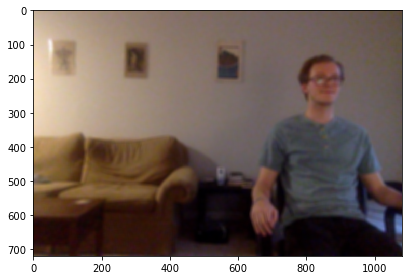

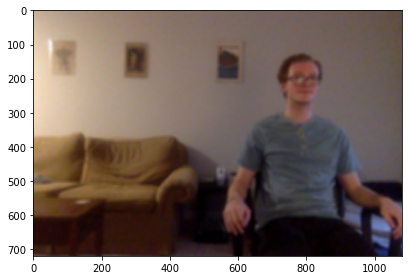

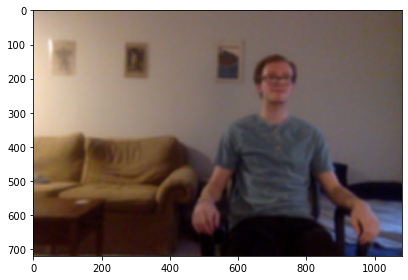

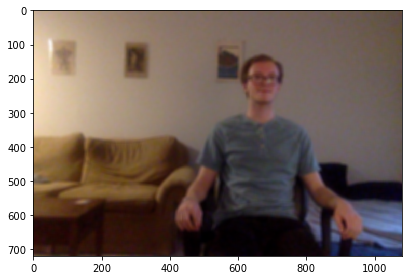

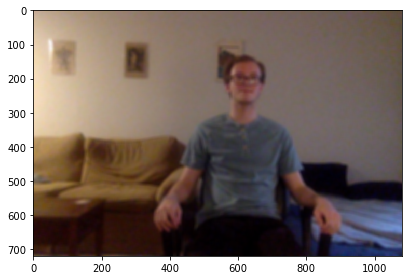

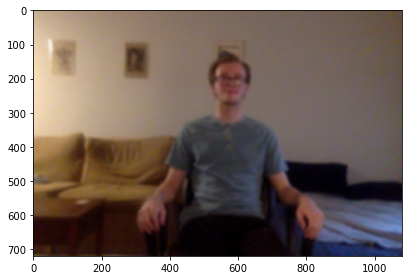

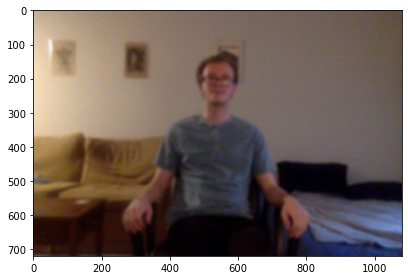

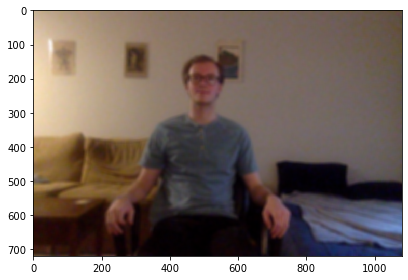

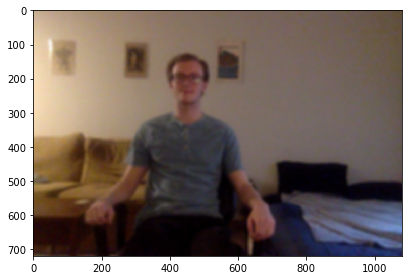

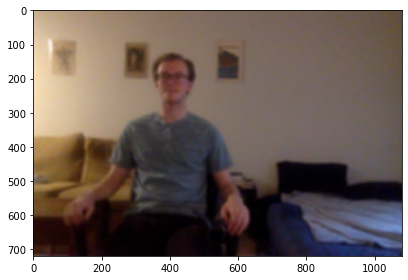

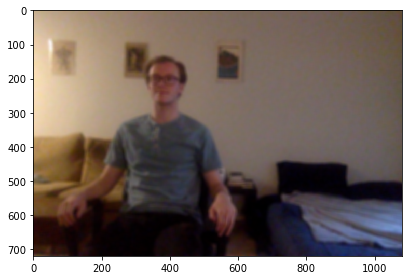

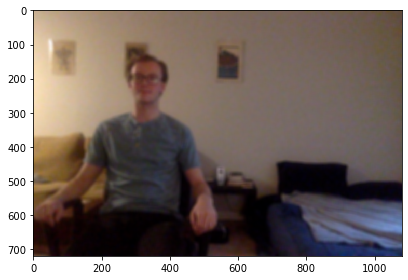

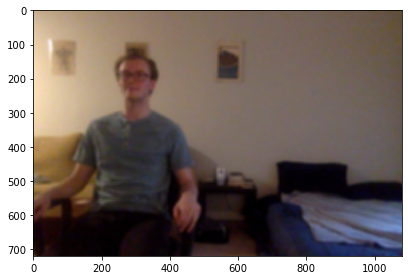

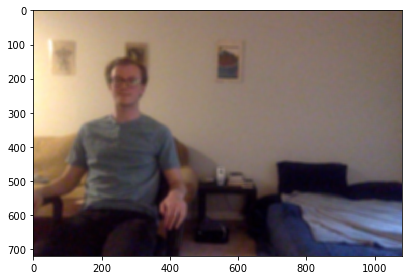

In [258]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import PIL
from PIL import Image
from PIL import ImageFilter
from skimage import data, color, io
from skimage.transform import rescale, resize, downscale_local_mean, pyramid_reduce
import math
import os
from numpy import linalg as LA


path = '/Users/cooperyoung/Desktop/jupyter/slide/'
data = []
shapes = []
epsilon = 40  #add two 0s if working with pendulum
alpha = 1

pics = []

# creates list of our images (data) 
for file in sorted(os.listdir(path)):
    if file.endswith(".jpeg"):
        # downsize images
        
        im = Image.open(path + file)
        blurred_im = im.filter(ImageFilter.BoxBlur(5))
        np_im = np.array(blurred_im)
        pics.append(np_im)
        
        resized_im = pyramid_reduce(blurred_im, downscale=6, multichannel=True)
        
        shapes.append(resized_im.shape)
        data.append(resized_im.ravel())
        
        
        
# Create our functions
def k(x, y):
    return (float(math.exp(-LA.norm(x-y, ord=2)/epsilon))) 


k_vals = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        k_vals[i, j] = k(data[i], data[j])

        
def q(n):
    sum = 0
    for j in range(0, len(data)):
        sum += k_vals[n][j]
    return(sum)


def w(n, m):
    denom = q(n) ** alpha + q(m) ** alpha
    return(k_vals[n][m]/denom)


for i in range(len(pics)):
    im = pics[i]
    io.imshow(im)
    plt.show() 


# How to turn vector data back into image by recalling its shape
#vector = data[0]
#ar = np.asarray(vector).reshape(shapes[0])
#im = Image.fromarray(ar)
#im.show()



In [259]:
# Compute our transition matrix
M = np.zeros((len(data), len(data)))

for i in range(len(data)):
    for j in range(len(data)):
        denom = 0
        for k in range(len(data)):
            denom += w(j, k)
        M[i, j] = w(i,j)/denom

print(M)

[[0.12898189 0.08232389 0.07536789 0.06524693 0.06196876 0.05778445
  0.05639063 0.05655068 0.05620413 0.05432237 0.05396034 0.05445662
  0.05475967 0.055223   0.05569768]
 [0.08297713 0.12589189 0.07691677 0.06769241 0.06289133 0.06049276
  0.05701482 0.05540322 0.0561717  0.05734597 0.05402165 0.05447262
  0.05469424 0.05507629 0.05535651]
 [0.07672675 0.07768711 0.12198072 0.0706824  0.06721916 0.06282321
  0.05983928 0.05826341 0.05596942 0.05560644 0.05669692 0.05578425
  0.05491739 0.05529545 0.0557163 ]
 [0.06754202 0.06952187 0.07187285 0.11559323 0.07220096 0.0688498
  0.06553729 0.06250213 0.06091508 0.05928404 0.05681174 0.05717661
  0.05870757 0.05672549 0.05671829]
 [0.0647969  0.06524387 0.06904212 0.07293071 0.11192227 0.07201494
  0.06856762 0.06637425 0.0635427  0.06172442 0.05957335 0.05826731
  0.05812556 0.05910422 0.05791518]
 [0.06087332 0.06322472 0.06500934 0.07006558 0.07255331 0.10925033
  0.07307869 0.06832744 0.06750762 0.06455955 0.06208275 0.06155154
  0.0

[0.9999999999999996, 0.12932303776428955, 0.09248046966429763, 0.06776489098022594, 0.057090930445730846, 0.02832211077769682, 0.030840874610570543, 0.04900057965536181, 0.03390444336421822, 0.046345736360555355, 0.036700485835552, 0.03791949002361253, 0.04343077190657479, 0.04070351801455763, 0.042073324553149556]
0.12932303776428955
[0.2512810718576678, 0.4200633052883815, -0.26410444094139646, 0.1848980912361171, 0.15792359539982403, 0.02111141090113418, -0.0004703598854109786, 0.0011458451083994744, 0.01485289109313872, -0.5783052086159979, 0.0881632235577788, 0.198266606534643, -0.15058062791831095, -0.1626623481275348, 0.4249269238684906]


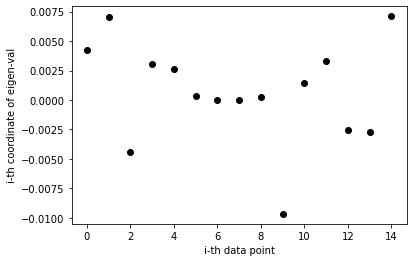

[ 9  2 13 12  6  7  8  5 10  4  3 11  0  1 14]


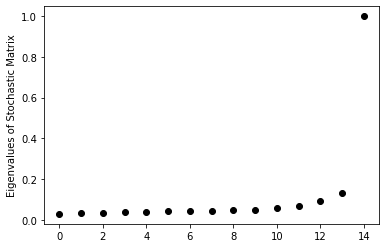

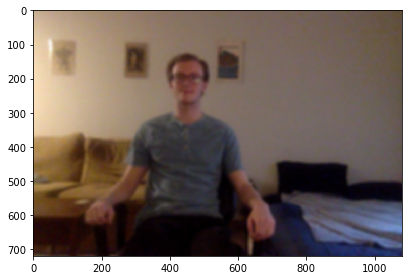

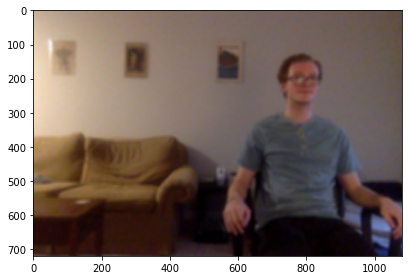

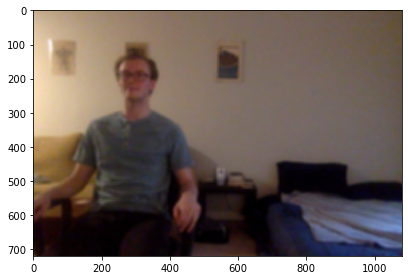

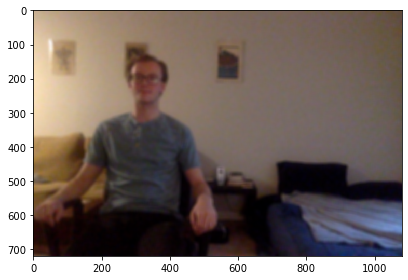

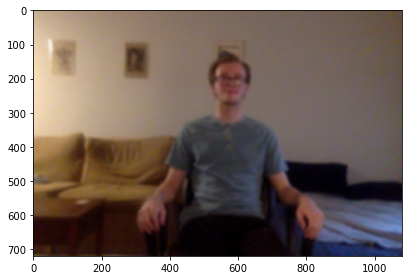

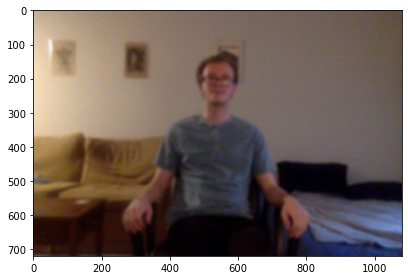

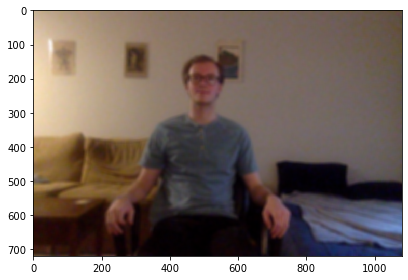

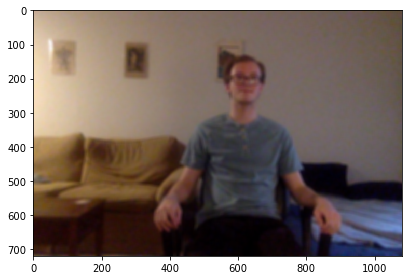

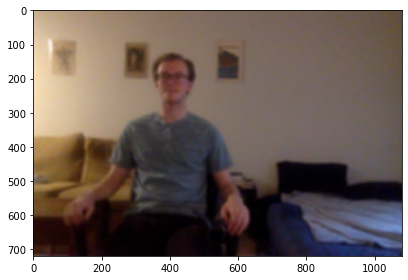

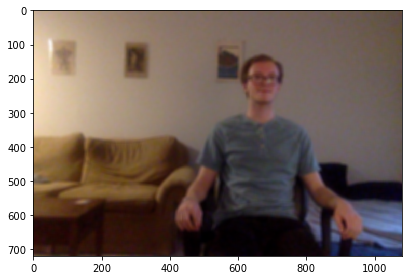

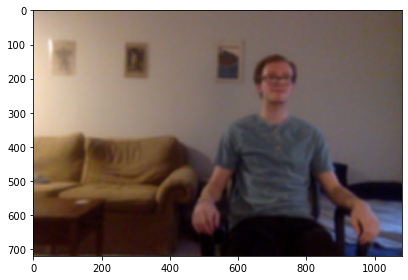

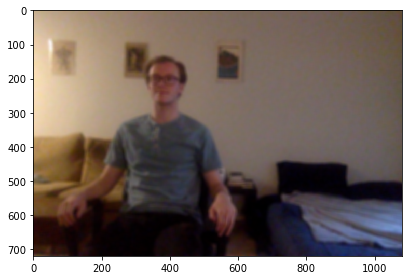

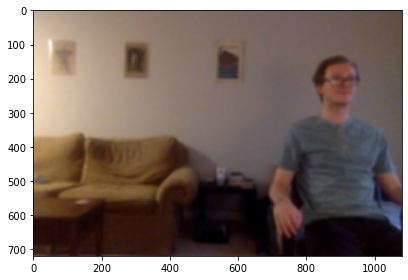

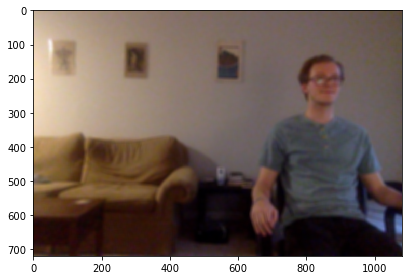

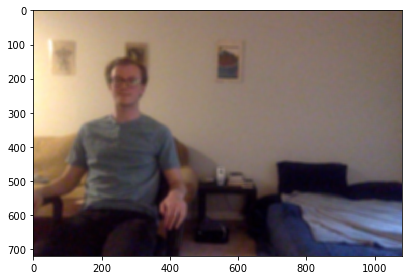

In [267]:
# plots the t-step diffusion map with one dimension (just one eigenvector)

def diffusion(t):
    
    eigen_vals, eigen_vecs = LA.eig(M)
    eigen_vals = eigen_vals.tolist()
    eigen_vecs = eigen_vecs.tolist()

    print(eigen_vals)
    # Find second largest eigenvalue 
    max_eigen_val = 0
    key_eigen_val = 0
    for i in range(len(data)):
        if (eigen_vals[i] > max_eigen_val):
            max_eigen_val = eigen_vals[i]
        if (eigen_vals[i] > key_eigen_val) & (eigen_vals[i] != max_eigen_val):
            key_eigen_val = eigen_vals[i]
          
    # Find cooresponding eigenvector
    key_eigen_vect = eigen_vecs[eigen_vals.index(key_eigen_val)]
    
    print(key_eigen_val)
    print(key_eigen_vect)
    
    # Embed our points in 1 dimensional space
    for i in range(len(data)):
        plt.plot(i, (key_eigen_val ** t) * key_eigen_vect[i], 'o',color='black')
   
    plt.xlabel("i-th data point")
    plt.ylabel("i-th coordinate of eigen-val")        
    plt.show()   

    
    # Sort data in order
    sort_index = np.argsort(key_eigen_vect) 
    print(sort_index) 
    
    eigen_vals.sort()
    for i in range(len(data)):
        plt.plot(i, eigen_vals[i], 'o',color='black')
    plt.ylabel("Eigenvalues of Stochastic Matrix")
    plt.show()    

    for i in range(len(sort_index)):
        im = pics[sort_index[i]]
        io.imshow(im)
        plt.show() 
    

diffusion(2)


In [230]:
#trying to go from array back to photo
#from PIL import ImageFilter
#vector = np.matrix(data[0])
#ar = np.asarray(vector).reshape(shapes[0])
#im = Image.fromarray(ar, 'RGB')


[]

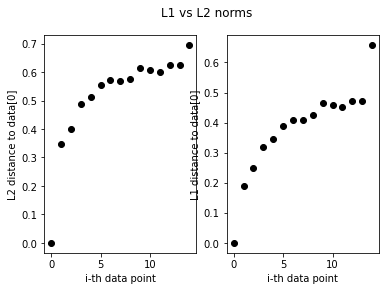

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('L1 vs L2 norms')

for i in range(len(data)):
        ax1.plot(i, LA.norm(data[i]-data[0], ord=2)/50, 'o',color='black')
        ax2.plot(i, LA.norm(data[i]-data[0], ord=1)/10000, 'o',color='black')
        
ax1.set_xlabel("i-th data point")
ax1.set_ylabel("L2 distance to data[0]") 

ax2.set_xlabel("i-th data point")
ax2.set_ylabel("L1 distance to data[0]")  

ax1.plot()
ax2.plot()
       
